In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
df= pd.read_csv("Sports-Data.csv.csv")

In [3]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [4]:
df.isna().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Game_number,2930,2930,Game_1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Result,2930,2,Win,2457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_team_Age,2833.0,NaN,NaN,NaN,29.242852,2.26423,12.0,30.0,30.0,30.0,70.0
Match_light_type,2878,3,Day,2041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_format,2860,4,ODI,1865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bowlers_in_team,2848.0,NaN,NaN,NaN,2.913624,1.023907,1.0,2.0,3.0,4.0,5.0
Wicket_keeper_in_team,2930.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
All_rounder_in_team,2890.0,NaN,NaN,NaN,2.722491,1.092699,1.0,2.0,3.0,4.0,4.0
First_selection,2871,3,Bowling,1722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Opponent,2894,9,South Africa,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for i in df:
    print(i,':',df[i].unique())
    print(df[i].value_counts())
    print('---------------------------')

Game_number : ['Game_1' 'Game_2' 'Game_3' ... 'Game_2928' 'Game_2929' 'Game_2930']
Game_1       1
Game_1947    1
Game_1949    1
Game_1950    1
Game_1951    1
            ..
Game_979     1
Game_980     1
Game_981     1
Game_982     1
Game_2930    1
Name: Game_number, Length: 2930, dtype: int64
---------------------------
Result : ['Loss' 'Win']
Win     2457
Loss     473
Name: Result, dtype: int64
---------------------------
Avg_team_Age : [18. 24. nan 17. 12. 25. 26. 27. 28. 29. 30. 70. 69. 50.]
30.0    2203
24.0     184
29.0     131
27.0      92
28.0      92
26.0      74
25.0      50
70.0       2
18.0       1
17.0       1
12.0       1
69.0       1
50.0       1
Name: Avg_team_Age, dtype: int64
---------------------------
Match_light_type : ['Day' 'Day and Night' nan 'Night']
Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64
---------------------------
Match_format : ['ODI' 'T20' 'Test' '20-20' nan]
ODI      1865
T20       864
Test    

In [8]:
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False)

Avg_team_Age            97
Bowlers_in_team         82
Audience_number         81
Match_format            70
Offshore                64
Season                  62
First_selection         59
Match_light_type        52
All_rounder_in_team     40
Opponent                36
Max_run_given_1over     34
Extra_bowls_bowled      29
Max_run_scored_1over    28
player_highest_run      28
Min_run_scored_1over    27
dtype: int64

In [9]:
mode1=df["Match_light_type"].mode().values[0]
mode2=df["Match_format"].mode().values[0]
mode3=df["First_selection"].mode().values[0]
mode4=df["Opponent"].mode().values[0]
mode5=df["Season"].mode().values[0]
mode6=df['Offshore'].mode().values[0]


df["Match_light_type"]=df["Match_light_type"].replace(np.nan,mode1)
df["Match_format"]= df["Match_format"].replace(np.nan,mode2)
df["First_selection"]=df["First_selection"].replace(np.nan,mode3)
df["Opponent"]=df["Opponent"].replace(np.nan,mode4)
df["Season"]=df["Season"].replace(np.nan,mode5)
df["Offshore"]=df["Offshore"].replace(np.nan,mode6)

In [10]:
median1=df["Avg_team_Age"].median()
median2=df["Bowlers_in_team"].median()
median3=df["All_rounder_in_team"].median()
median4=df["Audience_number"].median()
median5=df["Max_run_scored_1over"].median()
median6=df["Extra_bowls_bowled"].median()
median7=df["Min_run_scored_1over"].median()
median8=df["Max_run_given_1over"].median()
median9=df["player_highest_run"].median()

df["Avg_team_Age"].replace(np.nan,median1,inplace=True)
df["Bowlers_in_team"].replace(np.nan,median2,inplace=True)
df["All_rounder_in_team"].replace(np.nan,median3,inplace=True)
df["Audience_number"].replace(np.nan,median4,inplace=True)
df["Max_run_scored_1over"].replace(np.nan,median5,inplace=True)
df["Extra_bowls_bowled"].replace(np.nan,median6,inplace=True)
df["Min_run_scored_1over"].replace(np.nan,median7,inplace=True)
df["Max_run_given_1over"].replace(np.nan,median8,inplace=True)
df["player_highest_run"].replace(np.nan,median9,inplace=True)

In [11]:
df.isna().sum()

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

In [12]:
df['Players_scored_zero'].replace(to_replace='Three', value=3, inplace=True)
df.Players_scored_zero.value_counts()

3    1730
2     744
4     285
1     166
3       5
Name: Players_scored_zero, dtype: int64

In [13]:
df['Players_scored_zero'].replace(to_replace='3', value=3, inplace=True)
df.Players_scored_zero.value_counts()

3    1735
2     744
4     285
1     166
Name: Players_scored_zero, dtype: int64

In [14]:
df['player_highest_wicket'].replace(to_replace='Three', value=3, inplace=True)
df['player_highest_wicket'].replace(to_replace='3', value=3, inplace=True)
df.player_highest_wicket.value_counts()

1    1084
2    1063
3     434
4     211
5     138
Name: player_highest_wicket, dtype: int64

In [15]:
df.Match_format.value_counts()

ODI      1935
T20       864
Test      125
20-20       6
Name: Match_format, dtype: int64

In [16]:
df['Match_format'].replace(to_replace='20-20', value='T20', inplace=True)
df.Match_format.value_counts()

ODI     1935
T20      870
Test     125
Name: Match_format, dtype: int64

In [17]:
df.First_selection.value_counts()

Bowling    1781
Batting    1138
Bat          11
Name: First_selection, dtype: int64

In [18]:
df['First_selection'].replace(to_replace='Bat', value='Batting', inplace=True)
df.First_selection.value_counts()

Bowling    1781
Batting    1149
Name: First_selection, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2930 non-null   float64
 3   Match_light_type        2930 non-null   object 
 4   Match_format            2930 non-null   object 
 5   Bowlers_in_team         2930 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2930 non-null   float64
 8   First_selection         2930 non-null   object 
 9   Opponent                2930 non-null   object 
 10  Season                  2930 non-null   object 
 11  Audience_number         2930 non-null   float64
 12  Offshore                2930 non-null   object 
 13  Max_run_scored_1over    2930 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

# Univariate Analysis

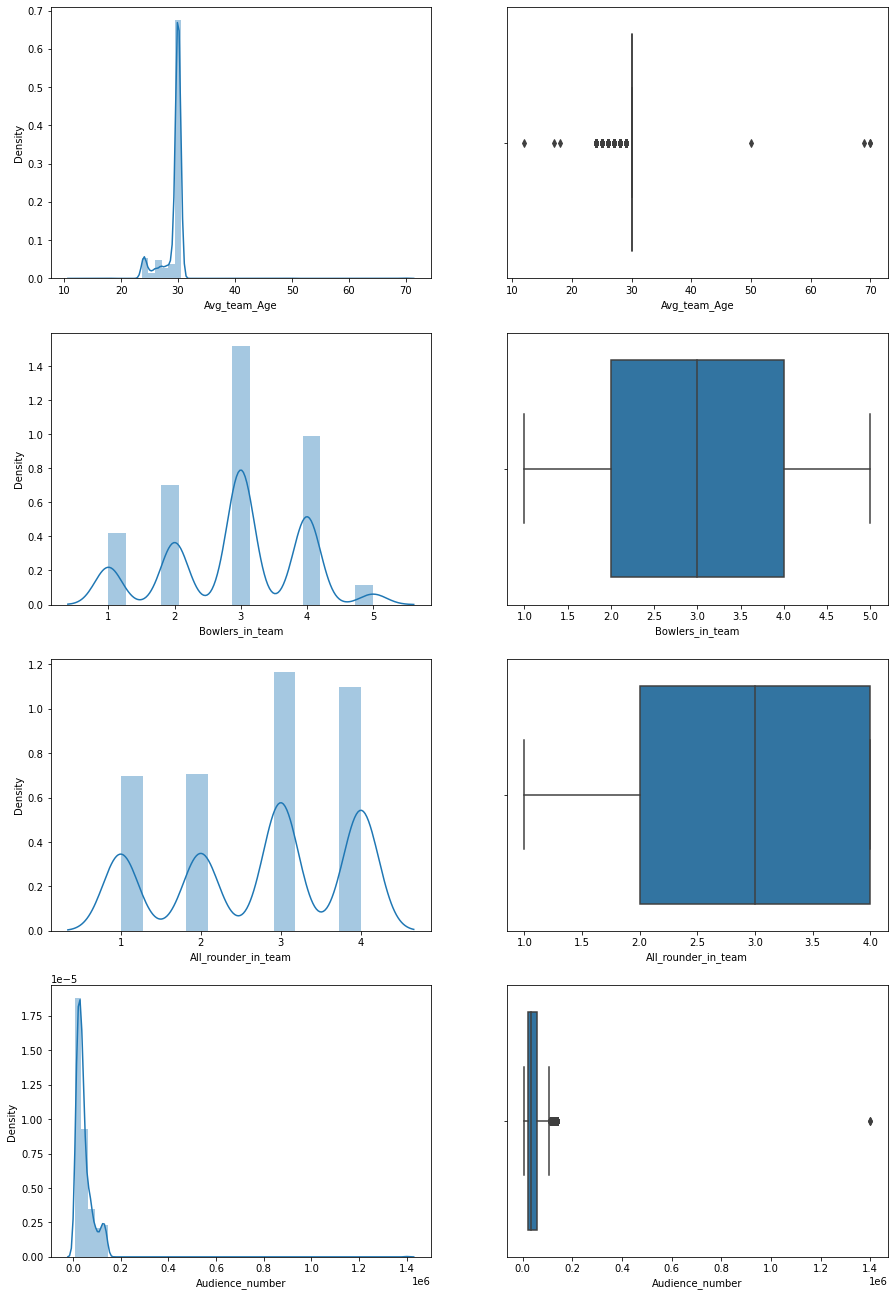

In [20]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,23)
a = sns.distplot(df['Avg_team_Age'] , ax=axes[0][0])
a = sns.boxplot(df['Avg_team_Age'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(df['Bowlers_in_team'], ax=axes[1][0])
a=sns.boxplot(df['Bowlers_in_team'],orient="v", ax=axes[1][1])

a=sns.distplot(df['All_rounder_in_team'], ax=axes[2][0])
a=sns.boxplot(df['All_rounder_in_team'],orient="v", ax=axes[2][1])

a=sns.distplot(df['Audience_number'], ax=axes[3][0])
a=sns.boxplot(df['Audience_number'],orient="v", ax=axes[3][1])

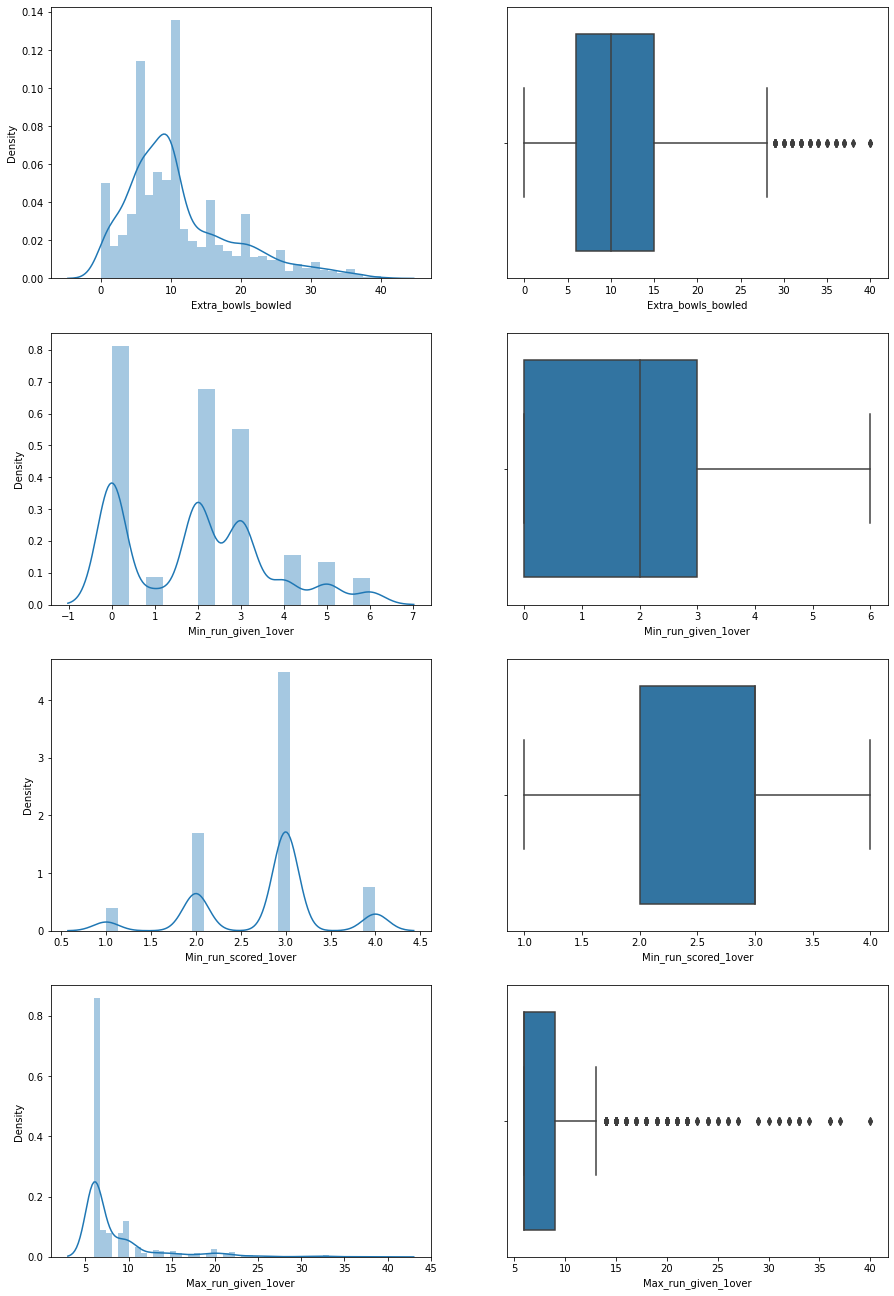

In [21]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,23)


a = sns.distplot(df['Extra_bowls_bowled'] , ax=axes[0][0])
a = sns.boxplot(df['Extra_bowls_bowled'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(df['Min_run_given_1over'], ax=axes[1][0])
a=sns.boxplot(df['Min_run_given_1over'],orient="v", ax=axes[1][1])

a=sns.distplot(df['Min_run_scored_1over'], ax=axes[2][0])
a=sns.boxplot(df['Min_run_scored_1over'],orient="v", ax=axes[2][1])

a=sns.distplot(df['Max_run_given_1over'], ax=axes[3][0])
a=sns.boxplot(df['Max_run_given_1over'],orient="v", ax=axes[3][1])

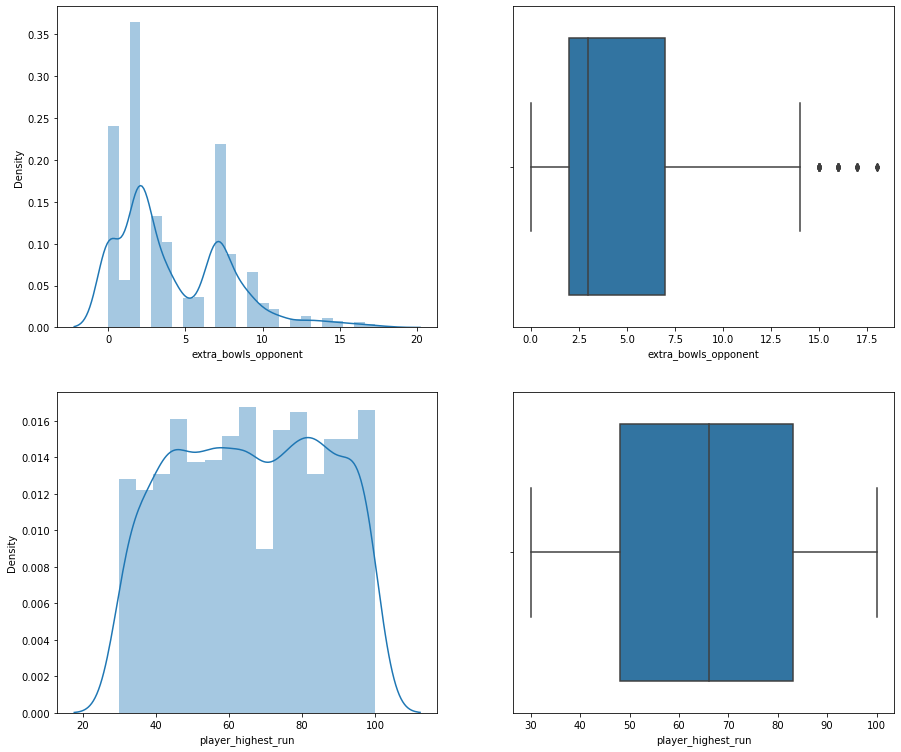

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(15,13)

a = sns.distplot(df['extra_bowls_opponent'] , ax=axes[0][0])
a = sns.boxplot(df['extra_bowls_opponent'] , orient = "v" , ax=axes[0][1])

a=sns.distplot(df['player_highest_run'], ax=axes[1][0])
a=sns.boxplot(df['player_highest_run'],orient="v", ax=axes[1][1])

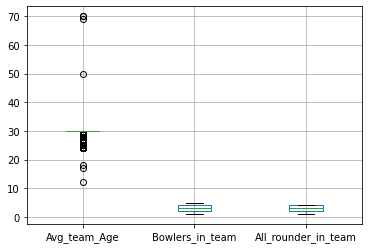

In [23]:
df.boxplot(column=['Avg_team_Age' , 'Bowlers_in_team','All_rounder_in_team'])
plt.show()

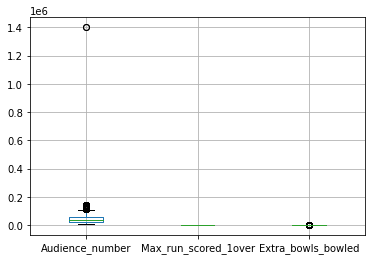

In [24]:
df.boxplot(column=['Audience_number','Max_run_scored_1over','Extra_bowls_bowled'])
plt.show()

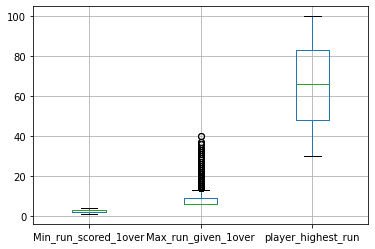

In [25]:
df.boxplot(column=['Min_run_scored_1over','Max_run_given_1over','player_highest_run'])
plt.show()

In [26]:
df["Players_scored_zero"]= pd.Categorical(df['Players_scored_zero'])
df['player_highest_wicket']=pd.Categorical(df['player_highest_wicket'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Game_number             2930 non-null   object  
 1   Result                  2930 non-null   object  
 2   Avg_team_Age            2930 non-null   float64 
 3   Match_light_type        2930 non-null   object  
 4   Match_format            2930 non-null   object  
 5   Bowlers_in_team         2930 non-null   float64 
 6   Wicket_keeper_in_team   2930 non-null   int64   
 7   All_rounder_in_team     2930 non-null   float64 
 8   First_selection         2930 non-null   object  
 9   Opponent                2930 non-null   object  
 10  Season                  2930 non-null   object  
 11  Audience_number         2930 non-null   float64 
 12  Offshore                2930 non-null   object  
 13  Max_run_scored_1over    2930 non-null   float64 
 14  Max_wicket_taken_1over  

# Univariate for Categorical variable

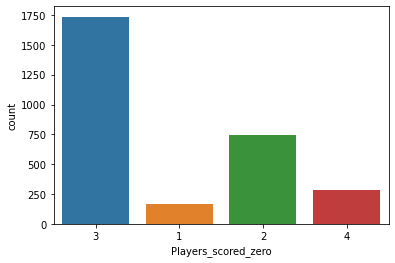

In [28]:
sns.countplot(x="Players_scored_zero", data=df);

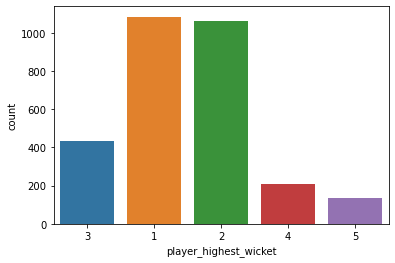

In [29]:
sns.countplot(x="player_highest_wicket", data=df);

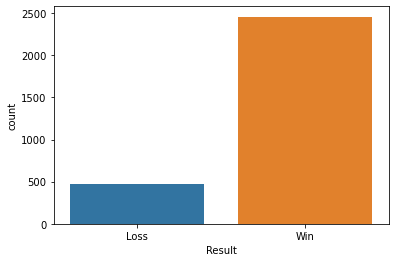

In [30]:
sns.countplot(x='Result', data=df);

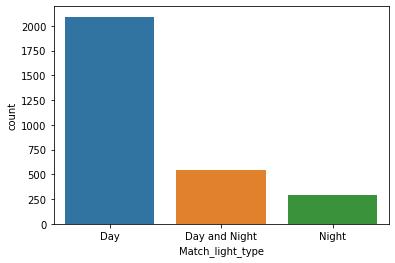

In [31]:
sns.countplot(df['Match_light_type']);

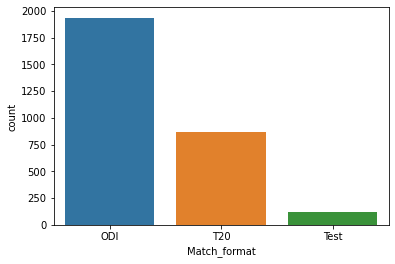

In [32]:
sns.countplot(df['Match_format']);

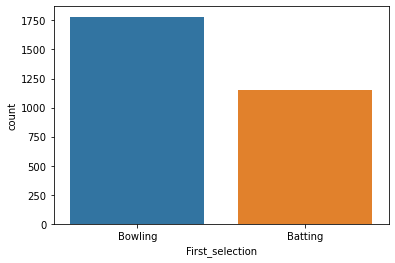

In [33]:
sns.countplot(x='First_selection', data=df);

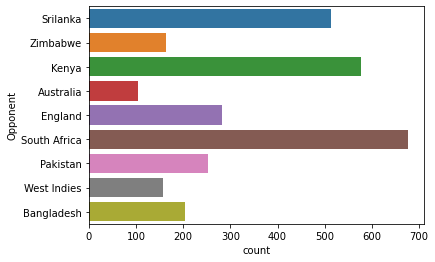

In [34]:
sns.countplot(y='Opponent', data=df);

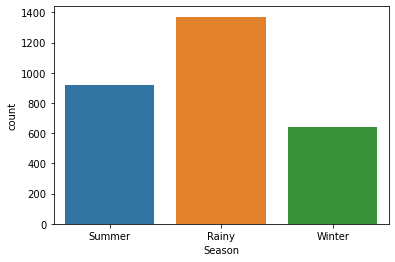

In [35]:
sns.countplot(x='Season', data=df);

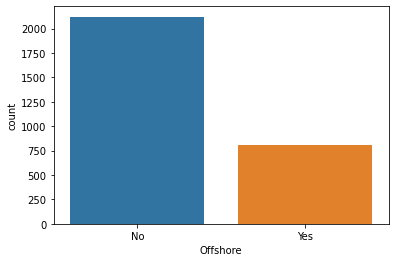

In [36]:
sns.countplot(x='Offshore', data=df);

# Bivariate Analysis for numerical variable

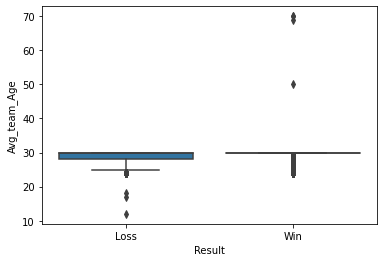

In [37]:
sns.boxplot(y='Avg_team_Age',x='Result', data=df);

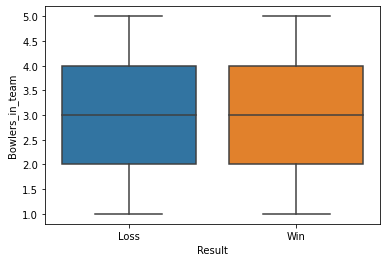

In [38]:
sns.boxplot(x='Result',y='Bowlers_in_team', data=df);

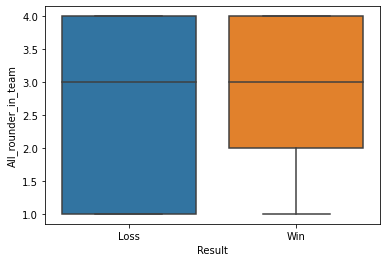

In [39]:
sns.boxplot(x='Result',y='All_rounder_in_team', data=df);

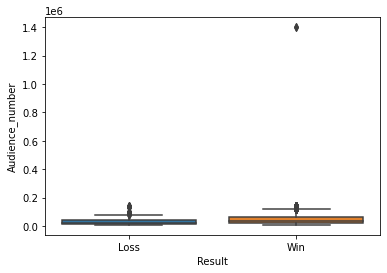

In [40]:
sns.boxplot(x='Result',y='Audience_number', data=df);

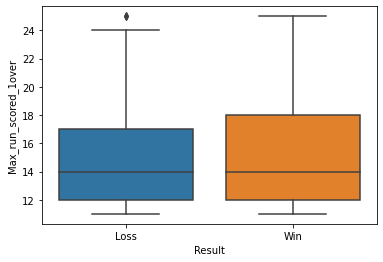

In [41]:
sns.boxplot(x='Result',y='Max_run_scored_1over', data=df);

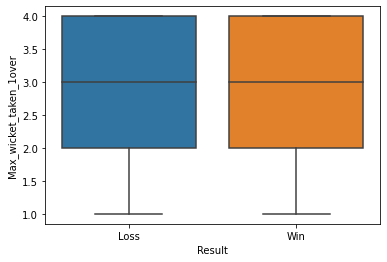

In [42]:
sns.boxplot(x='Result',y='Max_wicket_taken_1over', data=df);

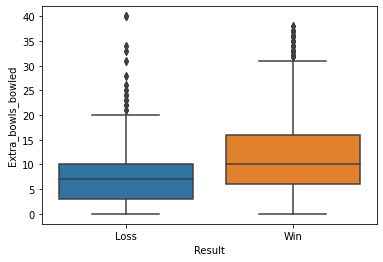

In [43]:
sns.boxplot(x='Result',y='Extra_bowls_bowled', data=df);

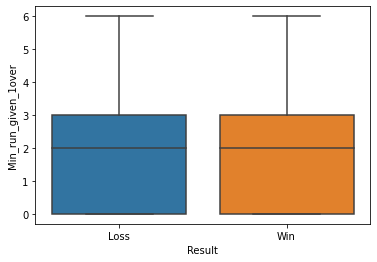

In [44]:
sns.boxplot(x='Result',y='Min_run_given_1over', data=df);

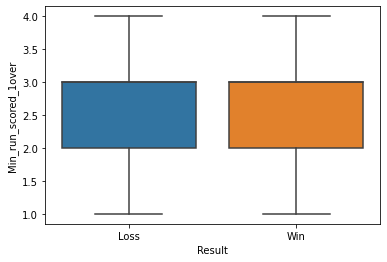

In [45]:
sns.boxplot(x='Result',y='Min_run_scored_1over', data=df);

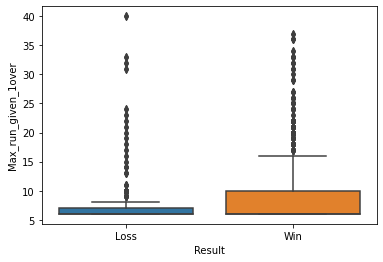

In [46]:
sns.boxplot(x='Result',y='Max_run_given_1over', data=df);

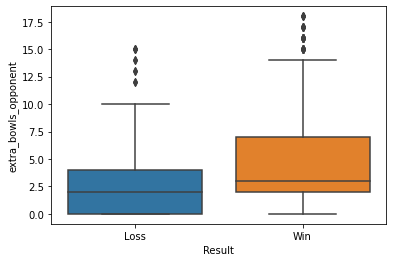

In [47]:
sns.boxplot(x='Result',y='extra_bowls_opponent', data=df);

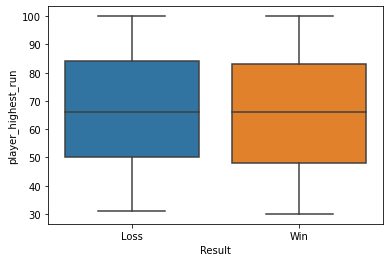

In [48]:
sns.boxplot(x='Result',y='player_highest_run', data=df);

# For Categorical Variable

In [49]:
pd.crosstab(index=df.Match_light_type,columns=df.Result)

Result,Loss,Win
Match_light_type,,
Day,314,1779
Day and Night,135,406
Night,24,272


In [50]:
pd.crosstab(index=df.Match_format,columns=df.Result)

Result,Loss,Win
Match_format,,
ODI,269,1666
T20,180,690
Test,24,101


In [51]:
pd.crosstab(index=df.First_selection,columns=df.Result)

Result,Loss,Win
First_selection,,
Batting,172,977
Bowling,301,1480


In [52]:
pd.crosstab(index=df.Opponent,columns=df.Result)

Result,Loss,Win
Opponent,,
Australia,24,80
Bangladesh,10,194
England,18,265
Kenya,93,483
Pakistan,17,236
South Africa,117,559
Srilanka,124,389
West Indies,4,154
Zimbabwe,66,97


In [53]:
pd.crosstab(index=df.Season,columns=df.Result)

Result,Loss,Win
Season,,
Rainy,170,1201
Summer,238,680
Winter,65,576


In [54]:
pd.crosstab(index=df.Offshore,columns=df.Result)

Result,Loss,Win
Offshore,,
No,227,1894
Yes,246,563


In [55]:
pd.crosstab(index=df.Players_scored_zero,columns=df.Result)

Result,Loss,Win
Players_scored_zero,,
3,250,1485
1,56,110
2,141,603
4,26,259


In [56]:
pd.crosstab(index=df.player_highest_wicket,columns=df.Result)

Result,Loss,Win
player_highest_wicket,,
3,63,371
1,286,798
2,104,959
4,10,201
5,10,128


# Multivariate Analysis

<AxesSubplot:>

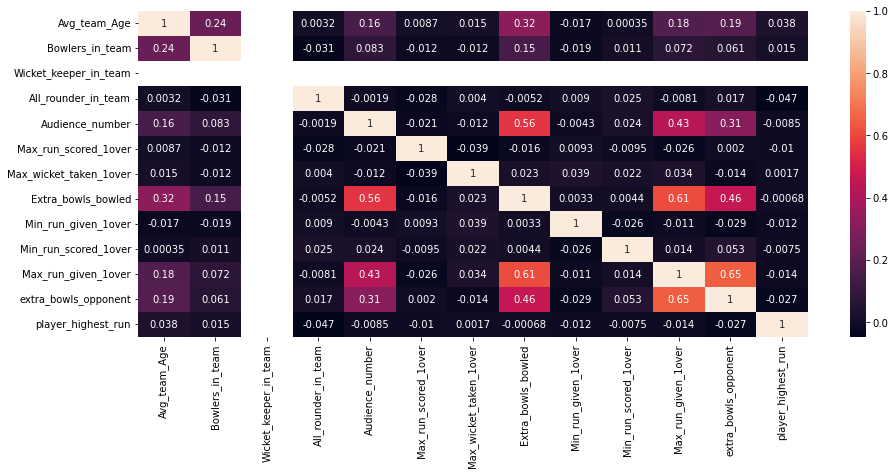

In [57]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lrincome,urincome=remove_outlier(df['Avg_team_Age'])
df['Avg_team_Age']=np.where(df['Avg_team_Age']>urincome,urincome,df['Avg_team_Age'])
df['Avg_team_Age']=np.where(df['Avg_team_Age']<lrincome,lrincome,df['Avg_team_Age'])

In [58]:
# Let's remove unwanted column first

In [59]:
df['Result']=pd.Categorical(df['Result']).codes

In [60]:
df['Result'].value_counts()

1    2457
0     473
Name: Result, dtype: int64

In [61]:
df['First_selection']=pd.Categorical(df['First_selection']).codes

In [62]:
df['First_selection'].value_counts()

1    1781
0    1149
Name: First_selection, dtype: int64

In [63]:
df['Offshore']=pd.Categorical(df['Offshore']).codes

In [64]:
df['Offshore'].value_counts()

0    2121
1     809
Name: Offshore, dtype: int64

In [65]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,0,18.0,Day,ODI,3.0,1,3.0,1,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,1,24.0,Day,T20,3.0,1,4.0,0,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,0,24.0,Day and Night,T20,3.0,1,2.0,1,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,1,24.0,Day,ODI,2.0,1,2.0,1,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,0,24.0,Night,ODI,1.0,1,3.0,1,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [66]:
df_1=df.copy()

In [67]:
df_1.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,0,18.0,Day,ODI,3.0,1,3.0,1,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,1,24.0,Day,T20,3.0,1,4.0,0,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,0,24.0,Day and Night,T20,3.0,1,2.0,1,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,1,24.0,Day,ODI,2.0,1,2.0,1,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,0,24.0,Night,ODI,1.0,1,3.0,1,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [68]:
df_1=pd.get_dummies(df_1,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket','Game_number'],drop_first=True)

In [69]:
a=df_1.pop('Result')
b=df_1

In [70]:
x_train1,x_test1,y_train1,y_test1= train_test_split(b, a, test_size=0.3, random_state=1)

In [71]:
select_feature = SelectKBest(chi2, k='all').fit(x_train1, y_train1)

In [72]:
selected_features_df = pd.DataFrame({'Feature':list(x_train1.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
5,Audience_number,1.539290e+06
9,Extra_bowls_bowled,3.373231e+02
13,extra_bowls_opponent,1.676524e+02
6,Offshore,8.085816e+01
26,Opponent_Zimbabwe,5.582450e+01
...,...,...
2952,Game_number_Game_988,NaN
2954,Game_number_Game_99,NaN
2959,Game_number_Game_994,NaN
2960,Game_number_Game_995,NaN


In [73]:
x_train_chi = select_feature.transform(x_train1)
x_test_chi = select_feature.transform(x_test1)

In [74]:
model = LogisticRegression()

In [75]:
lr_chi_model = model.fit(x_train_chi,y_train1)

In [76]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix

In [77]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
   
    return 

In [78]:
generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test1)

Accuracy is:  0.8361774744027304
F1 score is:  0.9107806691449815




In [79]:
# Lets drop the Game number as the chi square score is nt significant 

In [80]:
df_2=df.copy()

In [81]:
df_2 = df_2.drop(columns=['Game_number'], axis=1)
df_2.head()

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,Season,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,0,18.0,Day,ODI,3.0,1,3.0,1,Srilanka,Summer,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,1,24.0,Day,T20,3.0,1,4.0,0,Zimbabwe,Summer,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,0,24.0,Day and Night,T20,3.0,1,2.0,1,Zimbabwe,Rainy,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,1,24.0,Day,ODI,2.0,1,2.0,1,Kenya,Summer,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,0,24.0,Night,ODI,1.0,1,3.0,1,Srilanka,Summer,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [82]:
df_2=pd.get_dummies(df_2,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket'],drop_first=True)

In [83]:
p=df_2.pop('Result')
s=df_2

In [84]:
x_train2,x_test2,y_train2,y_test2= train_test_split(s, p, test_size=0.3, random_state=1)

In [85]:
select_feature = SelectKBest(chi2, k='all').fit(x_train2, y_train2)

In [86]:
selected_features_df1 = pd.DataFrame({'Feature':list(x_train2.columns),
                                     'Scores':select_feature.scores_})
selected_features_df1.sort_values(by='Scores', ascending=False)

,Feature,Scores
5,Audience_number,1.539290e+06
9,Extra_bowls_bowled,3.373231e+02
13,extra_bowls_opponent,1.676524e+02
6,Offshore,8.085816e+01
26,Opponent_Zimbabwe,5.582450e+01
32,player_highest_wicket_1,5.165594e+01
27,Season_Summer,4.525627e+01
12,Max_run_given_1over,3.913104e+01
29,Players_scored_zero_1,3.360147e+01
10,Min_run_given_1over,3.077176e+01


In [87]:
# Here we can see that the chi square score for wicket keeper variable is zero
# so we will be eliminating the variable to build our model

In [88]:
df = df.drop(columns=['Game_number','Wicket_keeper_in_team'], axis=1)
df.head()

,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,All_rounder_in_team,First_selection,Opponent,Season,Audience_number,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,0,18.0,Day,ODI,3.0,3.0,1,Srilanka,Summer,9940.0,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,1,24.0,Day,T20,3.0,4.0,0,Zimbabwe,Summer,8400.0,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,0,24.0,Day and Night,T20,3.0,2.0,1,Zimbabwe,Rainy,13146.0,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,1,24.0,Day,ODI,2.0,2.0,1,Kenya,Summer,7357.0,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,0,24.0,Night,ODI,1.0,3.0,1,Srilanka,Summer,13328.0,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [89]:
df=pd.get_dummies(df,columns=['Match_light_type','Match_format','Opponent','Season','Players_scored_zero','player_highest_wicket'],drop_first=True)

In [90]:
df2=df.copy()

In [91]:
# First we have to spli the data 
y=df.pop('Result')
x=df

In [92]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.3, random_state=1)

In [93]:
print("Training set for independent variable is",x_train.shape)
print("Test set for independent variable is",x_test.shape)
print("Training set for dependent variable is",y_train.shape)
print("Test set for dependent variable is",y_test.shape)

Training set for independent variable is (2051, 35)
Test set for independent variable is (879, 35)
Training set for dependent variable is (2051,)
Test set for dependent variable is (879,)


# Logistic Regression

In [94]:
# Let's first build the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [95]:
pred_train_lr = model.predict(x_train)
print(classification_report(y_train, pred_train_lr))

              precision    recall  f1-score   support

           0       0.74      0.04      0.08       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.79      0.52      0.50      2051
weighted avg       0.83      0.84      0.78      2051



AUC: 0.730


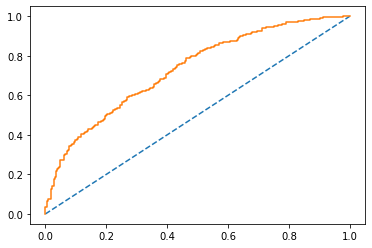

In [96]:
# Now let's check the ROC and AUC 
# predict probabilities
probs_lr = model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs_lr)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [97]:
confusion_matrix(y_train,pred_train_lr)

array([[  14,  315],
       [   5, 1717]], dtype=int64)

In [98]:
# lets check for test data
pred_test_lr = model.predict(x_test)
print(classification_report(y_test, pred_test_lr))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.92      0.51      0.48       879
weighted avg       0.87      0.84      0.77       879



AUC: 0.737


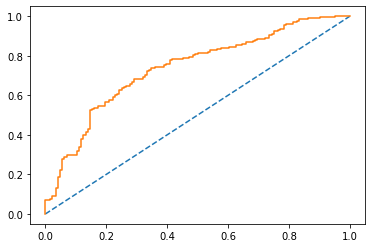

In [99]:
# predict probabilities
probs_test_lr = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_test_lr = probs_test_lr[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs_test_lr)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [100]:
confusion_matrix(y_test,pred_test_lr)

array([[  3, 141],
       [  0, 735]], dtype=int64)

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
grid= {'solver':['liblinear', 'newton-cg'],
      'penalty':['l1','l2','none'],'tol':[0.0001,0.000001],
      }

In [103]:
Lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [104]:
grid_search = GridSearchCV(estimator = Lr_model, param_grid = grid, cv = 3,n_jobs=-1)

In [105]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-06]})

In [106]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06}

In [107]:
best_lr= grid_search.best_estimator_

In [108]:
best_lr

LogisticRegression(max_iter=10000, n_jobs=-1, solver='liblinear', tol=1e-06)

In [109]:
#prediction for test and train dataset 
ytrain_predict_lr = best_lr.predict(x_train)
ytest_predict_lr = best_lr.predict(x_test)

In [110]:
print(classification_report(y_train,ytrain_predict_lr))
confusion_matrix(y_train,ytrain_predict_lr)

              precision    recall  f1-score   support

           0       0.72      0.34      0.46       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.80      0.66      0.70      2051
weighted avg       0.86      0.87      0.85      2051



array([[ 113,  216],
       [  45, 1677]], dtype=int64)

In [111]:
# Now lets perform for test data
print(classification_report(y_test,ytest_predict_lr))
confusion_matrix(y_test,ytest_predict_lr)

              precision    recall  f1-score   support

           0       0.70      0.35      0.47       144
           1       0.88      0.97      0.93       735

    accuracy                           0.87       879
   macro avg       0.79      0.66      0.70       879
weighted avg       0.85      0.87      0.85       879



array([[ 50,  94],
       [ 21, 714]], dtype=int64)

AUC: 0.844


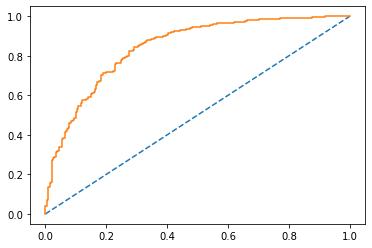

In [112]:
# Now let's check the ROC and AUC 
# predict probabilities
probs_lr = best_lr.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs_lr)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [113]:
# Let's check ROC and AUC for test dataset

AUC: 0.847


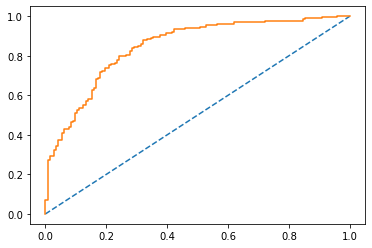

In [114]:
# predict probabilities
probs_test_lr = best_lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_test_lr = probs_test_lr[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs_test_lr)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_lr)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Now lets build LDA model

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [116]:
ldamodel = LinearDiscriminantAnalysis()
ldamodel.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [117]:
#lets fit the LDA model to train set

In [118]:
y_pred_lda = ldamodel.predict(x_train)
print(classification_report(y_train, y_pred_lda))
confusion_matrix(y_train,y_pred_lda)

              precision    recall  f1-score   support

           0       0.69      0.39      0.50       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.79      0.68      0.71      2051
weighted avg       0.86      0.87      0.86      2051



array([[ 127,  202],
       [  57, 1665]], dtype=int64)

,Predict 1,Predict 0
1,127,202
0,57,1665


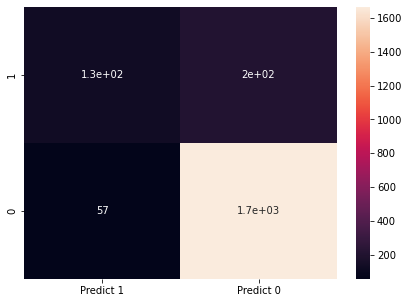

In [119]:
cm=metrics.confusion_matrix(y_train,y_pred_lda, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [120]:
# lets fit the model in testing data

In [121]:
y_pred_test_lda = ldamodel.predict(x_test)
print(classification_report(y_test, y_pred_test_lda))
confusion_matrix(y_test,y_pred_test_lda)

              precision    recall  f1-score   support

           0       0.67      0.33      0.44       144
           1       0.88      0.97      0.92       735

    accuracy                           0.86       879
   macro avg       0.78      0.65      0.68       879
weighted avg       0.85      0.86      0.84       879



array([[ 47,  97],
       [ 23, 712]], dtype=int64)

,Predict 1,Predict 0
1,47,97
0,23,712


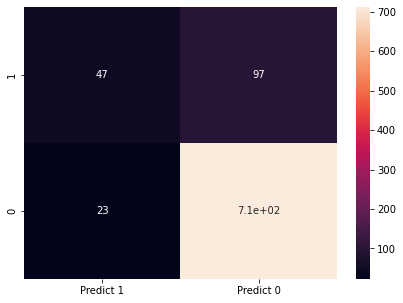

In [122]:
cm=metrics.confusion_matrix(y_test,y_pred_test_lda, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [123]:
### AUC and ROC for the training data

AUC: 0.832


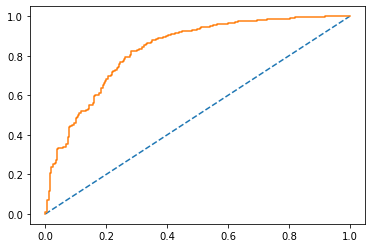

In [124]:
# predict probabilities
probs_lda = ldamodel.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_lda = probs_lda[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs_lda)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [125]:
### AUC and ROC for the test data

AUC: 0.850


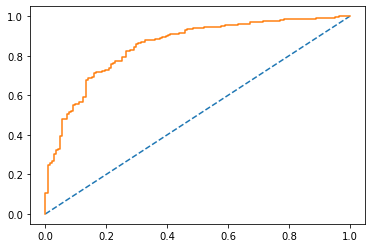

In [126]:
# predict probabilities
probs_ldatest = ldamodel.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_ldatest = probs_ldatest[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs_ldatest)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_ldatest)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [127]:
# lets see that hyperparameter can improve our model

In [128]:
best_ldamodel = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
best_ldamodel.fit(x_train, y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [129]:
# Train dataset

In [130]:
ylda_train= best_ldamodel.predict(x_train)
print(classification_report(y_train,ylda_train))
confusion_matrix(y_train,ylda_train)
print(best_ldamodel.score(x_train, y_train))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49       329
           1       0.89      0.97      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.79      0.67      0.71      2051
weighted avg       0.86      0.87      0.86      2051

0.8727450024378351


,Predict 1,Predict 0
1,126,203
0,58,1664


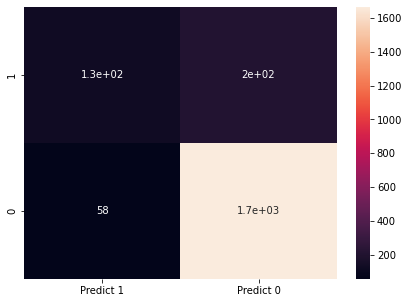

In [131]:
cm_lda=metrics.confusion_matrix(y_train,ylda_train, labels=[0, 1])

df_cm = pd.DataFrame(cm_lda, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [132]:
# Test dataset

In [133]:
ylda_test= best_ldamodel.predict(x_test)
print(classification_report(y_test,ylda_test))
confusion_matrix(y_test,ylda_test)
print(best_ldamodel.score(x_test, y_test))

              precision    recall  f1-score   support

           0       0.66      0.34      0.45       144
           1       0.88      0.97      0.92       735

    accuracy                           0.86       879
   macro avg       0.77      0.65      0.69       879
weighted avg       0.85      0.86      0.84       879

0.863481228668942


,Predict 1,Predict 0
1,49,95
0,25,710


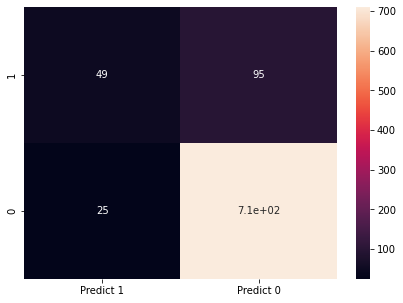

In [134]:
cm_lda_test=metrics.confusion_matrix(y_test,ylda_test, labels=[0, 1])

df_cm = pd.DataFrame(cm_lda_test, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [135]:
# AUC & ROC curve for best train model

AUC: 0.829


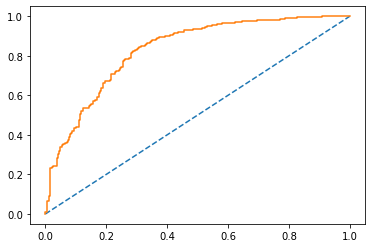

In [136]:
# predict probabilities
probs_train_tune = best_ldamodel.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_train_tune = probs_train_tune[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs_train_tune)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train_tune)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [137]:
# AUC & ROC curve for best test model

AUC: 0.851


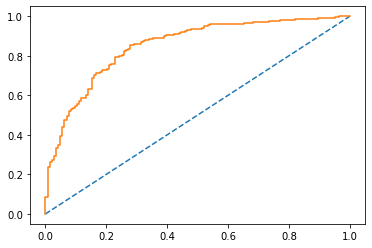

In [138]:
# predict probabilities
probs_test_tune = best_ldamodel.predict_proba(x_test)
probs_test_tune = probs_test_tune[:, 1]
lda_test_auc = roc_auc_score(y_test, probs_test_tune)
print('AUC: %.3f' % lda_test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_tune)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# KNN Model

In [139]:
Y=df2.pop('Result')

In [140]:
X=df2

In [141]:
Xscaled=X.apply(zscore)

In [142]:
Xscaled

,Avg_team_Age,Bowlers_in_team,All_rounder_in_team,First_selection,Audience_number,Offshore,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,...,Opponent_Zimbabwe,Season_Summer,Season_Winter,Players_scored_zero_1,Players_scored_zero_2,Players_scored_zero_4,player_highest_wicket_1,player_highest_wicket_2,player_highest_wicket_4,player_highest_wicket_5
0,-5.052516,0.083177,0.252159,0.803208,-0.750679,-0.617595,-0.600430,0.264714,-1.451878,0.028271,...,-0.242711,1.480446,-0.529183,-0.245067,-0.583393,-0.328254,1.304972,-0.754561,-0.278571,-0.222322
1,-2.362126,0.083177,1.173390,-1.245007,-0.782793,-0.617595,-0.874799,-1.586387,-1.451878,-1.163591,...,4.120129,1.480446,-0.529183,-0.245067,1.714110,-0.328254,1.304972,-0.754561,-0.278571,-0.222322
2,-2.362126,0.083177,-0.669071,0.803208,-0.683824,1.619184,-0.326060,1.190264,-1.451878,-1.163591,...,4.120129,-0.675472,-0.529183,-0.245067,-0.583393,-0.328254,1.304972,-0.754561,-0.278571,-0.222322
3,-2.362126,-0.907510,-0.669071,0.803208,-0.804543,-0.617595,-0.051690,1.190264,-1.451878,0.028271,...,-0.242711,1.480446,-0.529183,-0.245067,-0.583393,-0.328254,1.304972,-0.754561,-0.278571,-0.222322
4,-2.362126,-1.898197,0.252159,0.803208,-0.680029,-0.617595,-0.874799,1.190264,-1.451878,-1.163591,...,-0.242711,1.480446,-0.529183,-0.245067,-0.583393,-0.328254,1.304972,-0.754561,-0.278571,-0.222322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.328264,0.083177,1.173390,-1.245007,-0.249996,-0.617595,-0.051690,0.264714,-0.418538,-1.163591,...,-0.242711,1.480446,-0.529183,-0.245067,-0.583393,-0.328254,-0.766300,1.325274,-0.278571,-0.222322
2926,0.328264,1.073864,0.252159,0.803208,-0.547925,-0.617595,-0.326060,1.190264,-0.418538,0.028271,...,-0.242711,1.480446,-0.529183,-0.245067,1.714110,-0.328254,1.304972,-0.754561,-0.278571,-0.222322
2927,0.328264,1.073864,0.252159,0.803208,-0.127526,1.619184,-0.326060,1.190264,-0.160203,0.028271,...,-0.242711,-0.675472,-0.529183,-0.245067,-0.583393,-0.328254,-0.766300,1.325274,-0.278571,-0.222322
2928,0.328264,1.073864,0.252159,-1.245007,-0.665870,-0.617595,-0.326060,-0.660837,1.131472,0.028271,...,-0.242711,-0.675472,-0.529183,-0.245067,-0.583393,-0.328254,1.304972,-0.754561,-0.278571,-0.222322


In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
xtrain,xtest,ytrain,ytest= train_test_split(Xscaled,Y,test_size=0.30, random_state=1)

In [145]:
knnmodel = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [146]:
knnmodel.fit(xtrain,ytrain)

KNeighborsClassifier()

In [147]:
acc_train = []
acc_test = []

for i in np.arange(1,50):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(xtrain, ytrain)
    acc_train.append(knnmodel.score(xtrain,ytrain))
    acc_test.append(knnmodel.score(xtest,ytest))

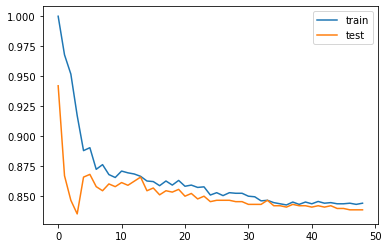

In [148]:
plt.plot(acc_train);
plt.plot(acc_test);
plt.legend(['train','test']);

In [149]:
KNN=pd.DataFrame(data=acc_test, columns=['Test'])
KNN['Train']=pd.DataFrame(data=acc_train)

In [150]:
KNN.head(10)

,Test,Train
0,0.941980,1.000000
1,0.866894,0.967821
2,0.846416,0.951731
3,0.835040,0.917114
4,0.865757,0.887860
5,0.868032,0.890297
6,0.857793,0.872257
7,0.854380,0.876158
8,0.860068,0.867869
9,0.857793,0.865431


In [151]:
# let's for the model on train set

In [152]:
pred_knn_train=knnmodel.predict(xtrain)
print(classification_report(ytrain,pred_knn_train))
confusion_matrix(ytrain,pred_knn_train)
print(knnmodel.score(xtrain, ytrain))

              precision    recall  f1-score   support

           0       0.91      0.03      0.06       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.88      0.51      0.49      2051
weighted avg       0.85      0.84      0.78      2051

0.8439785470502194


In [153]:
# lets fit the model on test set

,Predict 1,Predict 0
1,10,319
0,1,1721


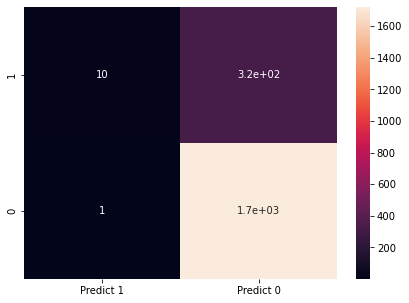

In [154]:
cm=metrics.confusion_matrix(ytrain,pred_knn_train, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [155]:
# lets fit the model for test dataset

In [156]:
pred_knn_test=knnmodel.predict(xtest)
print(classification_report(ytest,pred_knn_test))
confusion_matrix(ytest,pred_knn_test)
print(knnmodel.score(xtest, ytest))

              precision    recall  f1-score   support

           0       0.75      0.02      0.04       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.79      0.51      0.48       879
weighted avg       0.82      0.84      0.77       879

0.838452787258248


,Predict 1,Predict 0
1,3,141
0,1,734


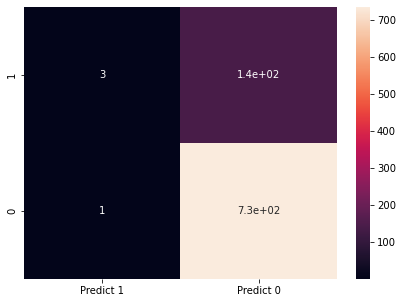

In [157]:
cm=metrics.confusion_matrix(ytest,pred_knn_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [158]:
# AUC and ROC curve for train

AUC: 0.829


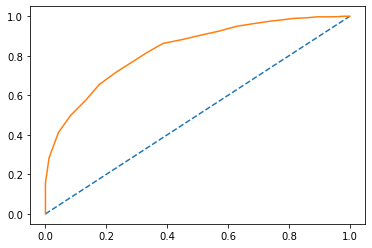

In [159]:
# predict probabilities
probs_knn_train = knnmodel.predict_proba(xtrain)
# keep probabilities for the positive outcome only
probs_knn_train = probs_knn_train[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(ytrain, probs_knn_train)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(ytrain, probs_knn_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [160]:
# AUC and ROC curve for test dataset

AUC: 0.792


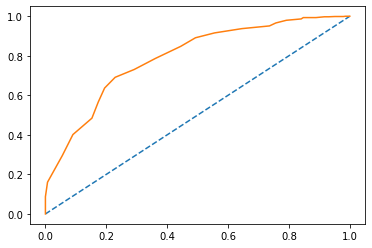

In [161]:
# predict probabilities
probs_knn_test = knnmodel.predict_proba(xtest)
# keep probabilities for the positive outcome only
probs_knn_test = probs_knn_test[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(ytest, probs_knn_test)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(ytest, probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# Decission Tree Model

In [162]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [163]:
# lets fit the model on train dataset

In [164]:
y_train_predict_dt = DT_model.predict(x_train)
model_score = DT_model.score(x_train, y_train)
print(metrics.classification_report(y_train, y_train_predict_dt))
print(metrics.confusion_matrix(y_train, y_train_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051

[[ 329    0]
 [   0 1722]]


,Predict 1,Predict 0
1,329,0
0,0,1722


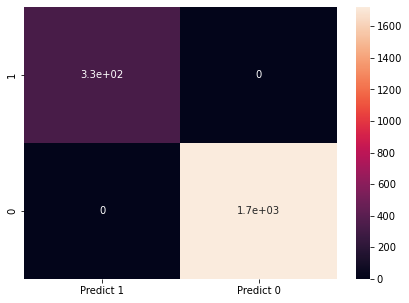

In [165]:
cm=metrics.confusion_matrix(y_train,y_train_predict_dt, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [166]:
# lets fit the model for test dataset

In [167]:
y_dt_predict_test = DT_model.predict(x_test)
model_score = DT_model.score(x_test, y_test)
print(metrics.classification_report(y_test, y_dt_predict_test))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71       144
           1       0.96      0.91      0.94       735

    accuracy                           0.89       879
   macro avg       0.80      0.86      0.82       879
weighted avg       0.91      0.89      0.90       879



,Predict 1,Predict 0
1,115,29
0,64,671


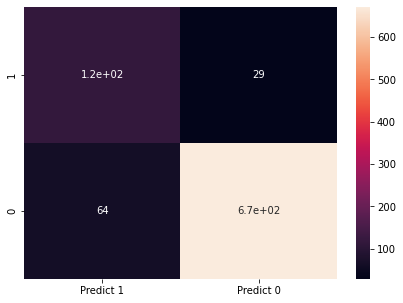

In [168]:
cm=metrics.confusion_matrix(y_test,y_dt_predict_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [169]:
pd.DataFrame(data = DT_model.feature_importances_, columns=['imp'],
             index = x.columns).sort_values(by = 'imp', ascending = False)

,imp
Audience_number,0.192815
player_highest_run,0.102790
Extra_bowls_bowled,0.100916
Season_Summer,0.070910
Max_run_scored_1over,0.067081
Offshore,0.054954
extra_bowls_opponent,0.047378
Max_wicket_taken_1over,0.044585
All_rounder_in_team,0.038314
Opponent_South Africa,0.034565


# here we can see that our model is overfited 
# To avoid overfitting we can use purning technique

In [170]:
# Lets build DT model using hyperparameter

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [173]:
# Lets fit the train data on hyperparameter data

In [174]:
y_train_dt = dTreeR.predict(x_train)
print(metrics.classification_report(y_train, y_train_dt))
print(metrics.confusion_matrix(y_train, y_train_dt))

              precision    recall  f1-score   support

           0       0.75      0.17      0.27       329
           1       0.86      0.99      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.81      0.58      0.60      2051
weighted avg       0.84      0.86      0.82      2051

[[  55  274]
 [  18 1704]]


,Predict 1,Predict 0
1,55,274
0,18,1704


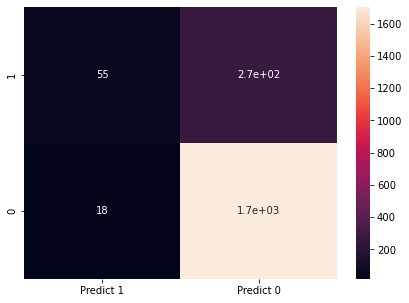

In [175]:
cm=metrics.confusion_matrix(y_train,y_train_dt, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [176]:
# Lets fit the test data on hyperparameter data

In [177]:
y_dt_test = dTreeR.predict(x_test)
print(metrics.classification_report(y_test, y_dt_test))
print(metrics.confusion_matrix(y_test, y_dt_test))

              precision    recall  f1-score   support

           0       0.75      0.12      0.21       144
           1       0.85      0.99      0.92       735

    accuracy                           0.85       879
   macro avg       0.80      0.56      0.57       879
weighted avg       0.84      0.85      0.80       879

[[ 18 126]
 [  6 729]]


,Predict 1,Predict 0
1,18,126
0,6,729


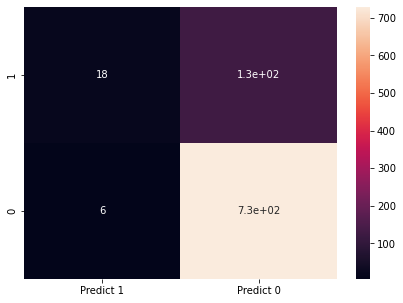

In [178]:
cm=metrics.confusion_matrix(y_test,y_dt_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [179]:
pd.DataFrame(data = dTreeR.feature_importances_, columns=['imp'],
             index = x.columns).sort_values(by = 'imp', ascending = False)

,imp
Extra_bowls_bowled,0.313183
Offshore,0.310110
Audience_number,0.257891
player_highest_run,0.085068
Max_run_given_1over,0.033748
Avg_team_Age,0.000000
Season_Winter,0.000000
Opponent_South Africa,0.000000
Opponent_Srilanka,0.000000
Opponent_West Indies,0.000000


# Random Forest Model

In [180]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

## Performance Matrix on train data set

In [181]:
y_train_predict = RF_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict))
print(metrics.confusion_matrix(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       329
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      2051
   macro avg       1.00      1.00      1.00      2051
weighted avg       1.00      1.00      1.00      2051

[[ 329    0]
 [   0 1722]]


# Lets for our model on test dataset

In [182]:
y_test_predict = RF_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict))
print(metrics.confusion_matrix(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       144
           1       0.95      0.99      0.97       735

    accuracy                           0.95       879
   macro avg       0.95      0.87      0.90       879
weighted avg       0.95      0.95      0.95       879

[[107  37]
 [  5 730]]


# WE can see that our RF model is overfitted so we will use hyperparameter for this model

In [183]:
param_grid = {
    'max_depth': [4,6,8],
    'max_features': [4,5,6],
    'min_samples_leaf': [6,8,10],
    'min_samples_split': [45], 
    'n_estimators': [100]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)


In [184]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [4, 6, 8], 'max_features': [4, 5, 6],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [45], 'n_estimators': [100]})

In [185]:
best_grid_rf=grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=6,
                       min_samples_split=45, random_state=1)

In [186]:
ytrain_predict_rf = best_grid_rf.predict(x_train)
ytest_predict_rf = best_grid_rf.predict(x_test)

# For train dataset

In [187]:
print(classification_report(y_train,ytrain_predict_rf))
confusion_matrix(y_train,ytrain_predict_rf)

              precision    recall  f1-score   support

           0       0.95      0.18      0.31       329
           1       0.86      1.00      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.91      0.59      0.62      2051
weighted avg       0.88      0.87      0.83      2051



array([[  60,  269],
       [   3, 1719]], dtype=int64)

# For test dataset

In [188]:
print(classification_report(y_test,ytest_predict_rf))
confusion_matrix(y_test,ytest_predict_rf)

              precision    recall  f1-score   support

           0       0.95      0.14      0.24       144
           1       0.86      1.00      0.92       735

    accuracy                           0.86       879
   macro avg       0.90      0.57      0.58       879
weighted avg       0.87      0.86      0.81       879



array([[ 20, 124],
       [  1, 734]], dtype=int64)

# Naive Bayes Model

In [189]:
from sklearn.naive_bayes import GaussianNB

In [190]:
# Let's build model on unscaled data

In [191]:
gnbmodel = GaussianNB()
gnbmodel.fit(x_train, y_train)

GaussianNB()

# For Train dataset

In [192]:
predNB_train = gnbmodel.predict(x_train)
print(classification_report(y_train, predNB_train))
confusion_matrix(y_train, predNB_train)

              precision    recall  f1-score   support

           0       0.34      0.38      0.36       329
           1       0.88      0.86      0.87      1722

    accuracy                           0.78      2051
   macro avg       0.61      0.62      0.61      2051
weighted avg       0.79      0.78      0.79      2051



array([[ 126,  203],
       [ 245, 1477]], dtype=int64)

,Predict 1,Predict 0
1,126,203
0,245,1477


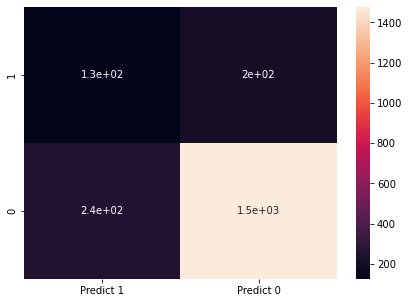

In [193]:
cm=metrics.confusion_matrix(y_train, predNB_train, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# For test dataset

In [194]:
predNB_test = gnbmodel.predict(x_test)
print(classification_report(y_test, predNB_test))
confusion_matrix(y_test, predNB_test)

              precision    recall  f1-score   support

           0       0.40      0.40      0.40       144
           1       0.88      0.88      0.88       735

    accuracy                           0.80       879
   macro avg       0.64      0.64      0.64       879
weighted avg       0.80      0.80      0.80       879



array([[ 58,  86],
       [ 86, 649]], dtype=int64)

,Predict 1,Predict 0
1,58,86
0,86,649


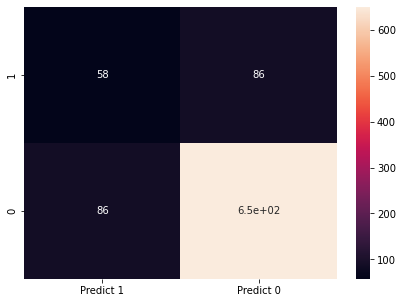

In [195]:
cm=metrics.confusion_matrix(y_test, predNB_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# Now we will fit the Model on scaled dataset

In [196]:
gnbmodel_scl = GaussianNB()
gnbmodel_scl.fit(xtrain, ytrain)

GaussianNB()

# For train dataset

In [197]:
predNB_train_scal = gnbmodel_scl.predict(xtrain)
print(classification_report(ytrain, predNB_train_scal))
confusion_matrix(ytrain, predNB_train_scal)

              precision    recall  f1-score   support

           0       0.26      0.84      0.39       329
           1       0.95      0.54      0.68      1722

    accuracy                           0.58      2051
   macro avg       0.60      0.69      0.54      2051
weighted avg       0.84      0.58      0.64      2051



array([[277,  52],
       [800, 922]], dtype=int64)

,Predict 1,Predict 0
1,277,52
0,800,922


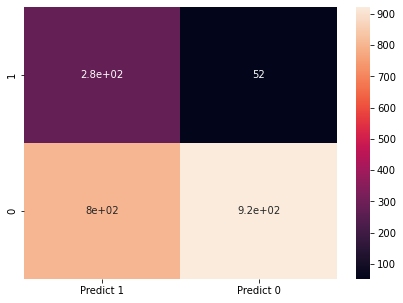

In [198]:
cm=metrics.confusion_matrix(ytrain, predNB_train_scal, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# For test Dataset

In [199]:
predNB_test_scal = gnbmodel_scl.predict(xtest)
print(classification_report(ytest, predNB_test_scal))
confusion_matrix(ytest, predNB_test_scal)

              precision    recall  f1-score   support

           0       0.26      0.84      0.40       144
           1       0.94      0.53      0.68       735

    accuracy                           0.58       879
   macro avg       0.60      0.69      0.54       879
weighted avg       0.83      0.58      0.63       879



array([[121,  23],
       [344, 391]], dtype=int64)

,Predict 1,Predict 0
1,121,23
0,344,391


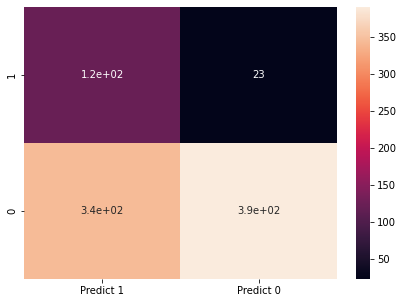

In [200]:
cm=metrics.confusion_matrix(ytest, predNB_test_scal, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# Neural Network Model

In [201]:
from sklearn.neural_network import MLPClassifier

In [202]:
model_nn = MLPClassifier(random_state=1)

In [203]:
model_nn.fit(x_train,y_train)

MLPClassifier(random_state=1)

In [204]:
ytrain_predict_nn = model_nn.predict(x_train)
ytest_predict_nn = model_nn.predict(x_test)

# For train dataset

In [205]:
print(classification_report(y_train,ytrain_predict_nn))
confusion_matrix(y_train,ytrain_predict_nn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       329
           1       0.84      1.00      0.91      1722

    accuracy                           0.84      2051
   macro avg       0.42      0.50      0.46      2051
weighted avg       0.70      0.84      0.77      2051



array([[   0,  329],
       [   0, 1722]], dtype=int64)

,Predict 1,Predict 0
1,0,329
0,0,1722


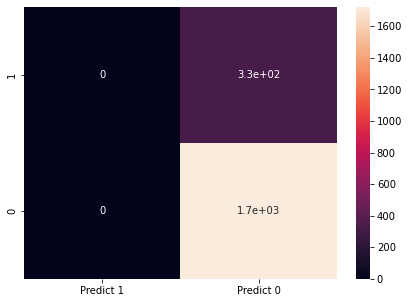

In [206]:
cm=metrics.confusion_matrix(y_train, ytrain_predict_nn, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# For test dataset

In [207]:
print(classification_report(y_test,ytest_predict_nn))
confusion_matrix(y_test,ytest_predict_nn)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.84      1.00      0.91       735

    accuracy                           0.84       879
   macro avg       0.42      0.50      0.46       879
weighted avg       0.70      0.84      0.76       879



array([[  0, 144],
       [  0, 735]], dtype=int64)

,Predict 1,Predict 0
1,0,144
0,0,735


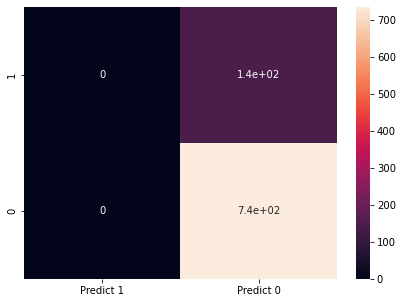

In [208]:
cm=metrics.confusion_matrix(y_test, ytest_predict_nn, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# Now Fit Neural Network on scaled data

In [209]:
model_nn_scl = MLPClassifier(random_state=1)

In [210]:
model_nn_scl.fit(xtrain,ytrain)

MLPClassifier(random_state=1)

In [211]:
ytrain_predict_nn_scl = model_nn.predict(xtrain)
ytest_predict_nn_scl = model_nn.predict(xtest)

# For train dataset

In [212]:
print(classification_report(ytrain,ytrain_predict_nn_scl))
confusion_matrix(ytrain,ytrain_predict_nn_scl)

              precision    recall  f1-score   support

           0       0.22      0.91      0.35       329
           1       0.96      0.37      0.53      1722

    accuracy                           0.46      2051
   macro avg       0.59      0.64      0.44      2051
weighted avg       0.84      0.46      0.50      2051



array([[ 300,   29],
       [1085,  637]], dtype=int64)

,Predict 1,Predict 0
1,300,29
0,1085,637


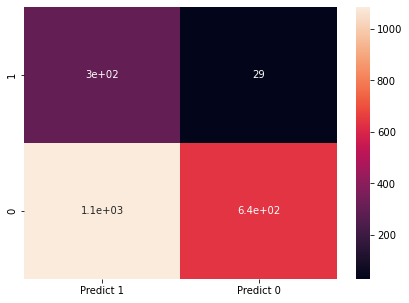

In [213]:
cm=metrics.confusion_matrix(ytrain,ytrain_predict_nn_scl, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# For Test dataset

In [214]:
print(classification_report(ytest,ytest_predict_nn_scl))
confusion_matrix(ytest,ytest_predict_nn_scl)

              precision    recall  f1-score   support

           0       0.22      0.91      0.36       144
           1       0.96      0.38      0.54       735

    accuracy                           0.47       879
   macro avg       0.59      0.65      0.45       879
weighted avg       0.84      0.47      0.51       879



array([[131,  13],
       [455, 280]], dtype=int64)

,Predict 1,Predict 0
1,131,13
0,455,280


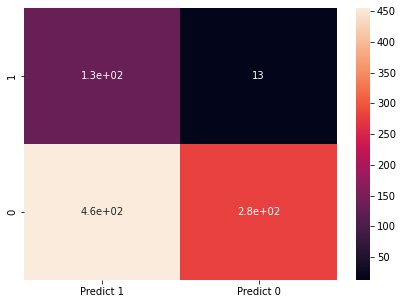

In [215]:
cm=metrics.confusion_matrix(ytest,ytest_predict_nn_scl, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

# Ensemble modeling Method

### Bagging method

In [216]:
from sklearn.ensemble import BaggingClassifier

In [217]:
Bagging_model=BaggingClassifier(base_estimator=best_grid_rf,random_state=1)
Bagging_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=8,
                                                        max_features=6,
                                                        min_samples_leaf=6,
                                                        min_samples_split=45,
                                                        random_state=1),
                  random_state=1)

# Lets build model for train dataset

In [218]:
y_train_predict_bg = Bagging_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_bg))
print(metrics.confusion_matrix(y_train, y_train_predict_bg))

              precision    recall  f1-score   support

           0       0.93      0.11      0.20       329
           1       0.85      1.00      0.92      1722

    accuracy                           0.86      2051
   macro avg       0.89      0.56      0.56      2051
weighted avg       0.87      0.86      0.81      2051

[[  37  292]
 [   3 1719]]


,Predict 1,Predict 0
1,37,292
0,3,1719


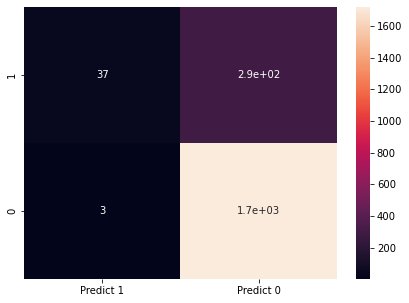

In [219]:
cm=metrics.confusion_matrix(y_train, y_train_predict_bg, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [220]:
# AUC and ROC For Train

AUC: 0.899


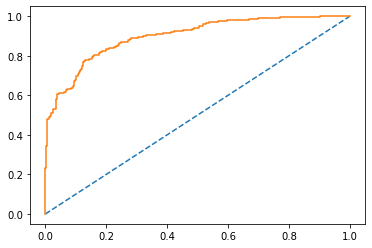

In [221]:
# predict probabilities
probs_train = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
rfb_train_auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % rfb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# For Test dataset

In [222]:
y_test_predict_bg = Bagging_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_bg))
print(metrics.confusion_matrix(y_test, y_test_predict_bg))

              precision    recall  f1-score   support

           0       0.91      0.07      0.13       144
           1       0.85      1.00      0.92       735

    accuracy                           0.85       879
   macro avg       0.88      0.53      0.52       879
weighted avg       0.86      0.85      0.79       879

[[ 10 134]
 [  1 734]]


,Predict 1,Predict 0
1,10,134
0,1,734


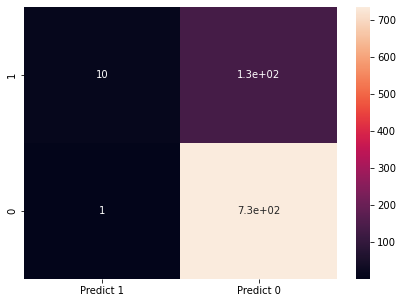

In [223]:
cm=metrics.confusion_matrix(y_test, y_test_predict_bg, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [224]:
# AUC and ROC for test

AUC: 0.872


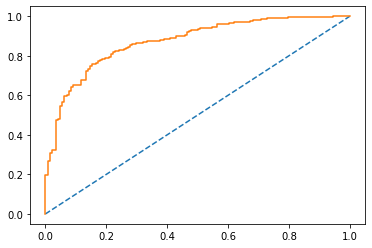

In [225]:
# predict probabilities
probs_test_bg = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_test_bg = probs_test_bg[:, 1]
# calculate AUC
rfb_test_auc = roc_auc_score(y_test, probs_test_bg)
print('AUC: %.3f' % rfb_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test_bg)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### ADA Boost Method

In [226]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

# For train dataset

In [227]:
y_train_predict_ada = ADB_model.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_ada))
print(metrics.confusion_matrix(y_train, y_train_predict_ada))

              precision    recall  f1-score   support

           0       0.78      0.41      0.54       329
           1       0.90      0.98      0.94      1722

    accuracy                           0.89      2051
   macro avg       0.84      0.69      0.74      2051
weighted avg       0.88      0.89      0.87      2051

[[ 134  195]
 [  37 1685]]


,Predict 1,Predict 0
1,134,195
0,37,1685


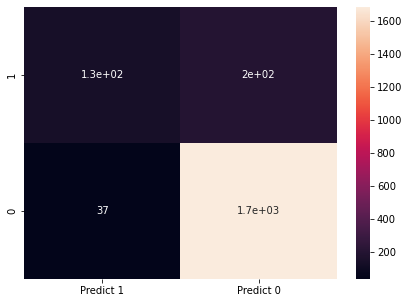

In [228]:
cm=metrics.confusion_matrix(y_train, y_train_predict_ada, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [229]:
# AUC and ROC for train dataset

AUC: 0.877


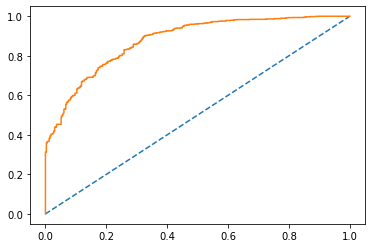

In [230]:
# predict probabilities
probs = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# For Test dataset

In [231]:
y_test_predict_ada = ADB_model.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_ada))
print(metrics.confusion_matrix(y_test, y_test_predict_ada))

              precision    recall  f1-score   support

           0       0.74      0.33      0.46       144
           1       0.88      0.98      0.93       735

    accuracy                           0.87       879
   macro avg       0.81      0.66      0.69       879
weighted avg       0.86      0.87      0.85       879

[[ 48  96]
 [ 17 718]]


,Predict 1,Predict 0
1,48,96
0,17,718


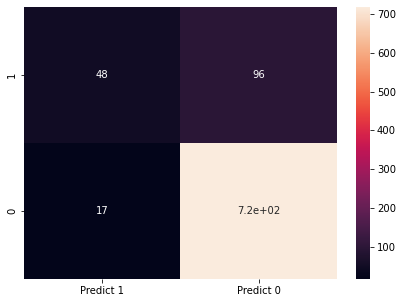

In [232]:
cm=metrics.confusion_matrix(y_test, y_test_predict_ada, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [233]:
# AUC and ROC for test dataset

AUC: 0.859


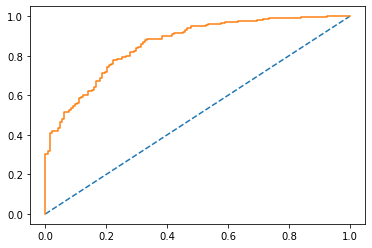

In [234]:
# predict probabilities
probs = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Gradient boosting method

In [235]:
from sklearn.ensemble import GradientBoostingClassifier

In [236]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

# For train Dataset

In [237]:
y_train_predict_gb = gbcl.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_gb))
print(metrics.confusion_matrix(y_train, y_train_predict_gb))

              precision    recall  f1-score   support

           0       0.95      0.60      0.74       329
           1       0.93      0.99      0.96      1722

    accuracy                           0.93      2051
   macro avg       0.94      0.80      0.85      2051
weighted avg       0.93      0.93      0.92      2051

[[ 197  132]
 [  10 1712]]


,Predict 1,Predict 0
1,197,132
0,10,1712


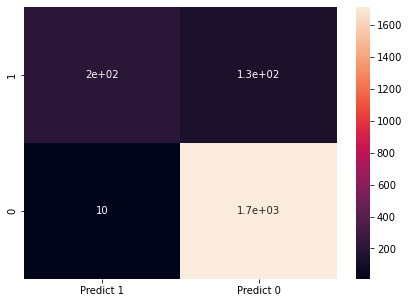

In [238]:
cm=metrics.confusion_matrix(y_train, y_train_predict_gb, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [239]:
# ROC and AUC for train

AUC: 0.961


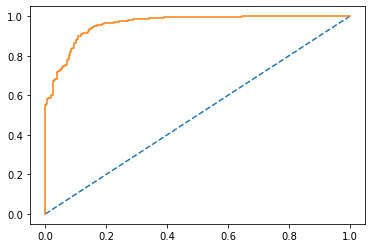

In [240]:
# predict probabilities
probs_gb = gbcl.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]
# calculate AUC
gb_train_auc = roc_auc_score(y_train, probs_gb)
print('AUC: %.3f' % gb_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_gb)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# For Test dataset

In [241]:
y_test_predict_gb = gbcl.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_gb))
print(metrics.confusion_matrix(y_test, y_test_predict_gb))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57       144
           1       0.90      0.99      0.94       735

    accuracy                           0.90       879
   macro avg       0.89      0.71      0.76       879
weighted avg       0.90      0.90      0.88       879

[[ 61  83]
 [  8 727]]


,Predict 1,Predict 0
1,61,83
0,8,727


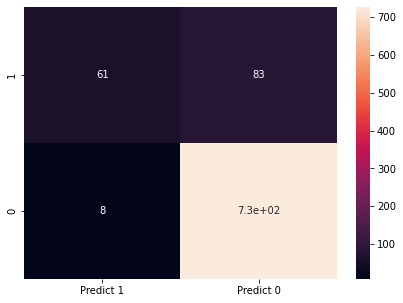

In [242]:
cm=metrics.confusion_matrix(y_test, y_test_predict_gb, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [243]:
# ROC and AUC for test dataset

AUC: 0.905


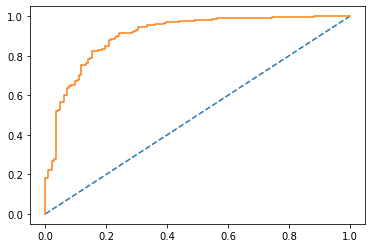

In [244]:
probs_gb = gbcl.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]
# calculate AUC
gb_test_auc = roc_auc_score(y_test, probs_gb)
print('AUC: %.3f' % gb_test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_gb)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Smote

In [245]:
y.value_counts()

1    2457
0     473
Name: Result, dtype: int64

In [246]:
# here we can see data imbalance in the data so we will oversampling technique to check the performance of the model

In [247]:
from imblearn.over_sampling import SMOTE

In [248]:
sm = SMOTE(random_state=1)
X_train_res, Y_train_res = sm.fit_resample(x_train, y_train)

In [249]:
Y_train_res.value_counts()

1    1722
0    1722
Name: Result, dtype: int64

# RF with SMOTE

In [250]:
# For Train dataset

In [251]:
rfmodel_SM=best_grid_rf.fit(X_train_res,Y_train_res)

In [252]:
pred_rf_SM_train= rfmodel_SM.predict(X_train_res)
print(classification_report(Y_train_res,pred_rf_SM_train))
confusion_matrix(Y_train_res,pred_rf_SM_train)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1722
           1       0.90      0.95      0.92      1722

    accuracy                           0.92      3444
   macro avg       0.92      0.92      0.92      3444
weighted avg       0.92      0.92      0.92      3444



array([[1548,  174],
       [  94, 1628]], dtype=int64)

,Predict 1,Predict 0
1,1548,174
0,94,1628


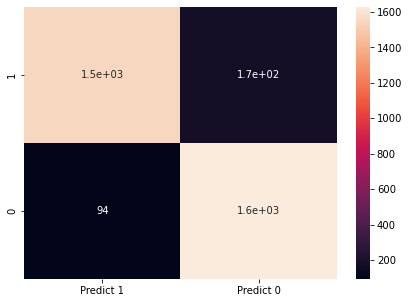

In [253]:
cm=metrics.confusion_matrix(Y_train_res,pred_rf_SM_train, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.977


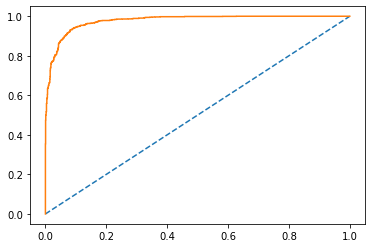

In [254]:
probs_sm = rfmodel_SM.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs_sm = probs_sm[:, 1]
# calculate AUC
sm_train_auc = roc_auc_score(Y_train_res, probs_sm)
print('AUC: %.3f' % sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_res, probs_sm)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [255]:
#For Test dataset

In [256]:
pred_rf_SM_test= rfmodel_SM.predict(x_test)
print(classification_report(y_test,pred_rf_SM_test))
confusion_matrix(y_test,pred_rf_SM_test)

              precision    recall  f1-score   support

           0       0.55      0.44      0.49       144
           1       0.90      0.93      0.91       735

    accuracy                           0.85       879
   macro avg       0.72      0.69      0.70       879
weighted avg       0.84      0.85      0.84       879



array([[ 64,  80],
       [ 52, 683]], dtype=int64)

,Predict 1,Predict 0
1,64,80
0,52,683


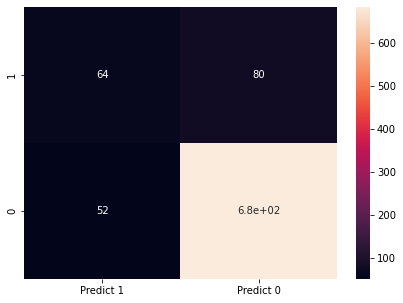

In [257]:
cm=metrics.confusion_matrix(y_test,pred_rf_SM_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.836


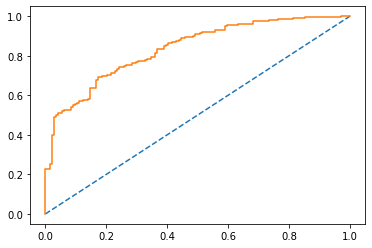

In [258]:
probs_sm_test = rfmodel_SM.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs_sm_test = probs_sm_test[:, 1]
# calculate AUC
sm_test_auc = roc_auc_score(y_test, probs_sm_test)
print('AUC: %.3f' % sm_test_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs_sm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# Smote on KNN 

In [259]:
X_train_res_scl= X_train_res.apply(zscore)

In [260]:
knnmodel_SM= KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [261]:
knnmodel_SM.fit(X_train_res_scl,Y_train_res)

KNeighborsClassifier()

# For Train dataset

In [262]:
pred_knn_SM=knnmodel_SM.predict(X_train_res_scl)
print(classification_report(Y_train_res,pred_knn_SM))
print(confusion_matrix(Y_train_res,pred_knn_SM))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1722
           1       0.96      0.87      0.91      1722

    accuracy                           0.92      3444
   macro avg       0.92      0.92      0.92      3444
weighted avg       0.92      0.92      0.92      3444

[[1662   60]
 [ 226 1496]]


,Predict 1,Predict 0
1,1662,60
0,226,1496


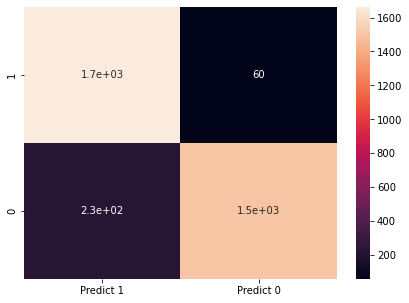

In [263]:
cm=metrics.confusion_matrix(Y_train_res,pred_knn_SM, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

AUC: 0.988


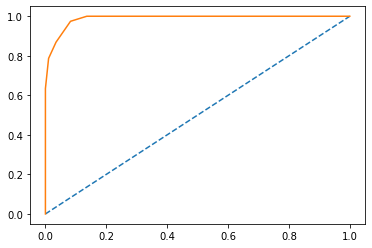

In [264]:
probs_sm = knnmodel_SM.predict_proba(X_train_res_scl)
# keep probabilities for the positive outcome only
probs_sm = probs_sm[:, 1]
# calculate AUC
sm_train_auc = roc_auc_score(Y_train_res, probs_sm)
print('AUC: %.3f' % sm_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train_res, probs_sm)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

# For test dataset

In [265]:
pred_knn_SM_test=knnmodel_SM.predict(xtest)
print(classification_report(ytest,pred_knn_SM_test))
print(confusion_matrix(ytest,pred_knn_SM_test))

              precision    recall  f1-score   support

           0       0.38      0.76      0.51       144
           1       0.94      0.76      0.84       735

    accuracy                           0.76       879
   macro avg       0.66      0.76      0.67       879
weighted avg       0.85      0.76      0.79       879

[[109  35]
 [177 558]]


,Predict 1,Predict 0
1,109,35
0,177,558


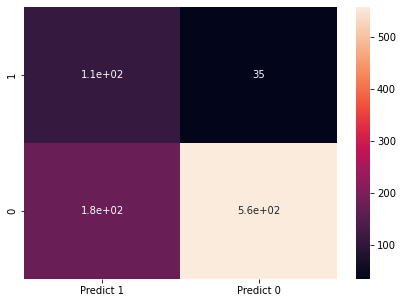

In [266]:
cm=metrics.confusion_matrix(ytest,pred_knn_SM_test, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
df_cm

In [267]:
# AUC and ROC for test 

AUC: 0.844


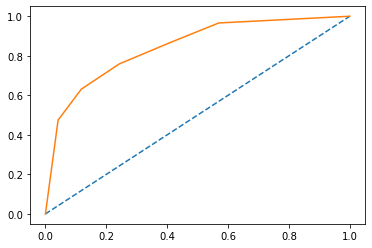

In [268]:
# predict probabilities
probs_knntest = knnmodel_SM.predict_proba(xtest)
# keep probabilities for the positive outcome only
probs_knntest = probs_knntest[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(ytest, probs_knntest)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(ytest, probs_knntest)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [269]:
grid_GD= {'n_estimators':[40,50,60],
      'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],'loss':['deviance','exponential'],'max_features':[6,7,8],'min_samples_leaf':[30,40,50]
      }
grid_search_GD= GridSearchCV(estimator=gbcl, param_grid=grid_GD, cv=3,n_jobs=2)

In [270]:
grid_search_GD.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=2,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'mae'],
                         'loss': ['deviance', 'exponential'],
                         'max_features': [6, 7, 8],
                         'min_samples_leaf': [30, 40, 50],
                         'n_estimators': [40, 50, 60]})

In [271]:
grid_search_GD.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'max_features': 6,
 'min_samples_leaf': 30,
 'n_estimators': 60}

In [272]:
best_GDmodel= grid_search_GD.best_estimator_
best_GDmodel

GradientBoostingClassifier(loss='deviance', max_features=6, min_samples_leaf=30,
                           n_estimators=60, random_state=1)

In [273]:
y_train_predict_gb = best_GDmodel.predict(x_train)
print(metrics.classification_report(y_train, y_train_predict_gb))
print(metrics.confusion_matrix(y_train, y_train_predict_gb))

              precision    recall  f1-score   support

           0       0.87      0.35      0.50       329
           1       0.89      0.99      0.94      1722

    accuracy                           0.89      2051
   macro avg       0.88      0.67      0.72      2051
weighted avg       0.89      0.89      0.87      2051

[[ 114  215]
 [  17 1705]]


In [274]:
y_test_predict_gb = best_GDmodel.predict(x_test)
print(metrics.classification_report(y_test, y_test_predict_gb))
print(metrics.confusion_matrix(y_test, y_test_predict_gb))

              precision    recall  f1-score   support

           0       0.86      0.26      0.40       144
           1       0.87      0.99      0.93       735

    accuracy                           0.87       879
   macro avg       0.87      0.63      0.67       879
weighted avg       0.87      0.87      0.84       879

[[ 38 106]
 [  6 729]]
